In [1]:
!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

     |████████████████████████████████| 15.5MB 147kB/s 
     |████████████████████████████████| 21.4MB 107kB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.3.0.10 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.3.0+cu100 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


In [0]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sift_crop.jpg to sift_crop.jpg
Saving sift_crop_rotate_90degree.jpg to sift_crop_rotate_90degree (1).jpg
Saving sift_image.jpg to sift_image (1).jpg
User uploaded file "sift_crop.jpg" with length 51439 bytes
User uploaded file "sift_image.jpg" with length 42753 bytes
User uploaded file "sift_crop_rotate_90degree.jpg" with length 52947 bytes


-----------------------IMAGE-----------------------


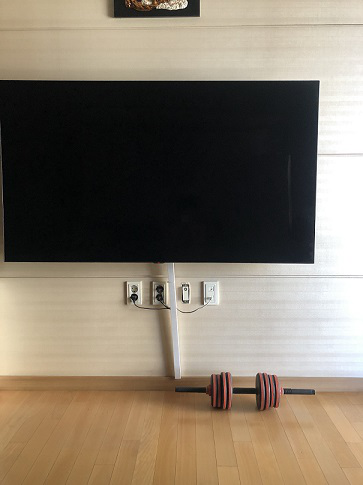


-----------------------TEMPLATE-----------------------


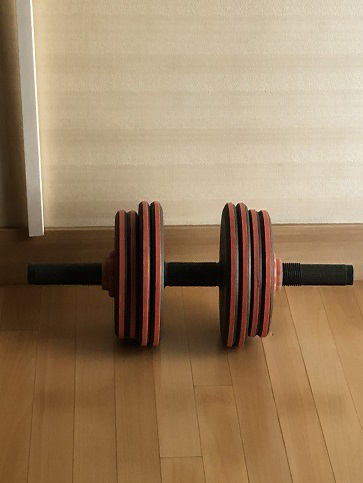

In [6]:
img = cv2.imread('sift_image.jpg',1)

template = cv2.imread('sift_crop.jpg',1)


print('-----------------------IMAGE-----------------------')
cv2_imshow(img)

print('\n-----------------------TEMPLATE-----------------------')
cv2_imshow(template)

In [0]:
sift = cv2.xfeatures2d.SIFT_create()

In [0]:
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(template,None)

In [0]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [0]:
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])

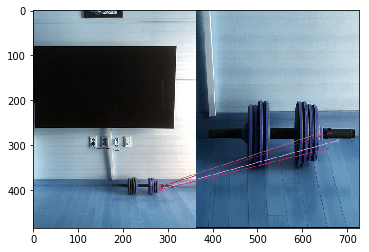

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [13]:
img3 = cv2.drawMatchesKnn(img,kp1,template,kp2,good,None,flags=2)
plt.imshow(img3)
plt.show()

%time

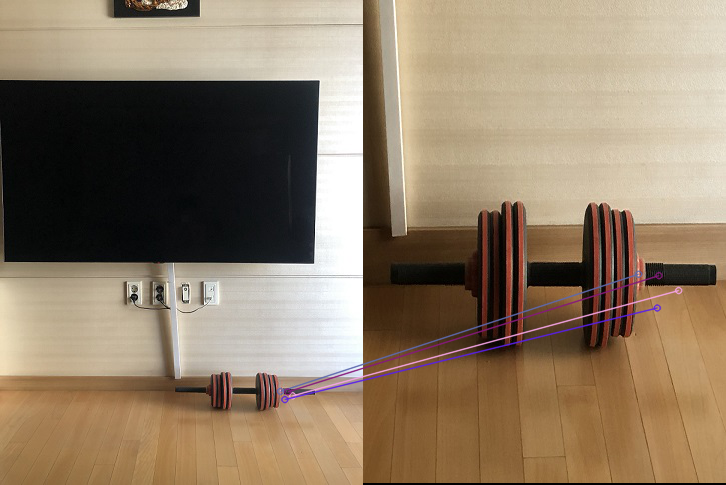

In [14]:
cv2_imshow(img3)

In [15]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sift_crop.jpg to sift_crop (1).jpg
Saving sift_crop_rotate_90degree.jpg to sift_crop_rotate_90degree (2).jpg
Saving sift_image.jpg to sift_image (2).jpg
User uploaded file "sift_crop.jpg" with length 51439 bytes
User uploaded file "sift_image.jpg" with length 42753 bytes
User uploaded file "sift_crop_rotate_90degree.jpg" with length 52947 bytes


-----------------------IMAGE-----------------------


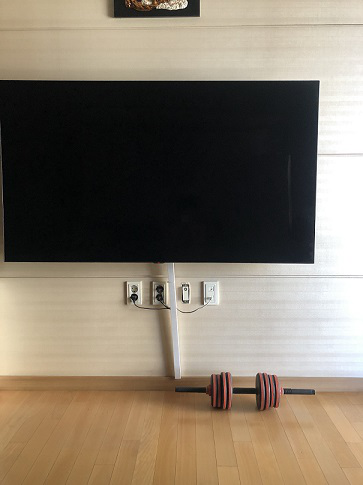


-----------------------TEMPLATE ROTATED BY 90 Degree-----------------------


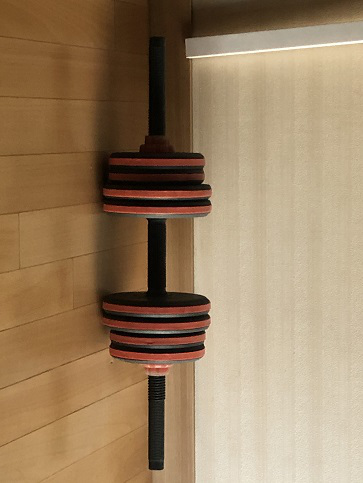

In [16]:
img = cv2.imread('sift_image.jpg',1)

template_rotate= cv2.imread('sift_crop_rotate_90degree.jpg',1)


print('-----------------------IMAGE-----------------------')
cv2_imshow(img)

print('\n-----------------------TEMPLATE ROTATED BY 90 Degree-----------------------')
cv2_imshow(template_rotate)

In [0]:
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(template_rotate,None)

In [0]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [0]:
good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])

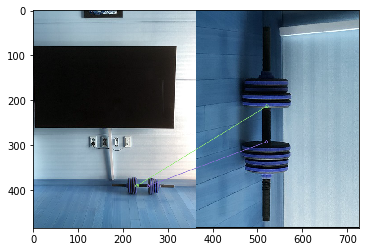

In [20]:
res2 = cv2.drawMatchesKnn(img,kp1,template_rotate,kp2,good,None,flags=2)
plt.imshow(res2)
plt.show()

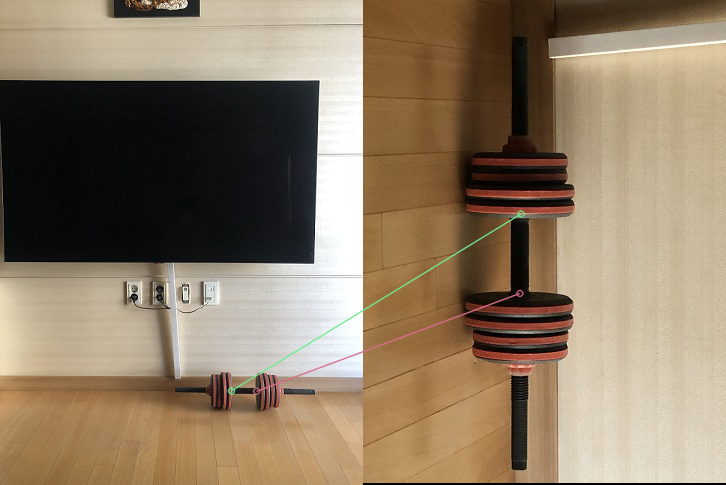

In [21]:
cv2_imshow(res2)

In [0]:
good1 = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good1.append([m])

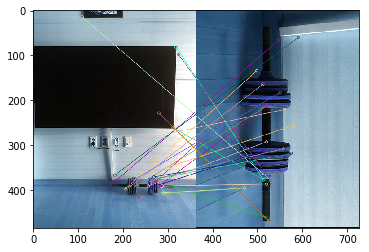

In [23]:
res3 = cv2.drawMatchesKnn(img,kp1,template_rotate,kp2,good1,None,flags=2)
plt.imshow(res3)
plt.show()

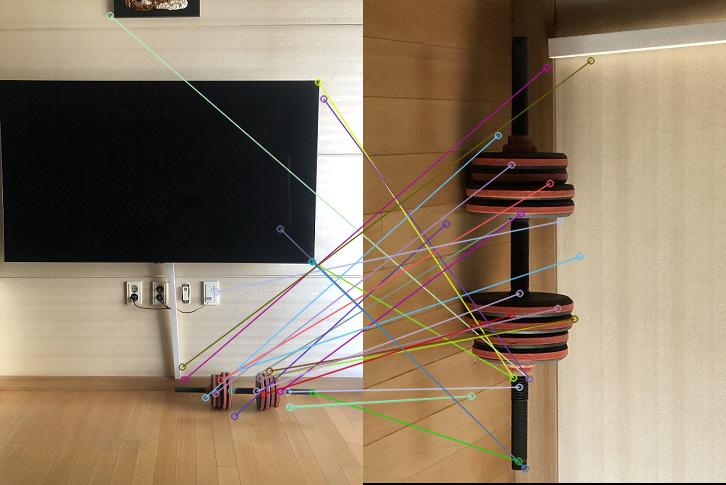

In [24]:
cv2_imshow(res3)